In [1]:
%matplotlib inline

In [2]:
import seaborn
seaborn.set_context("notebook", rc={"figure.dpi": 600})

In [3]:
import pathlib



import numpy as np
import math
import pandas

from scipy import signal

from scipy.interpolate import interp2d

from matplotlib import pylab

from multiprocessing import Pool

from kaskady2.analyze.profile import *
from kaskady2.analyze.fluctuation_treshold import FluctuationCalculation
from kaskady2.loader.reader import CascadeSetLoader



In [4]:
cascades = CascadeSetLoader.find_cascades(
  pathlib.Path('/home/jb/kaskady-data/g4-production'), 
  material_names= {'xenon'}, cuts_kev={1200}
)

In [5]:
fits_dir = pathlib.Path("/tmp/fluc")
fits_dir.mkdir(exist_ok=True)

In [6]:
geometry = cascades[0].main_geometry


In [7]:
calc = FluctuationCalculation.from_geometry(geometry, .9)

In [8]:
calc.percentile_bin()

array([ 111.,  116.,  119.,  122.,  125.,  128.,  131.,  135.,  140.,  152.])

In [9]:
len(cascades)

26

In [10]:
percentiles = np.arange(5, 100, 10)


In [11]:
calc = FluctuationCalculation.from_geometry(cascades[0].main_geometry, 0.8)

In [12]:
result = []
for ii, casc in enumerate(cascades):
    calc = FluctuationCalculation.from_geometry(casc.main_geometry, 0.8)
    try:
        calc.histogram_stats
    except ValueError as e: 
        raise ValueError(casc.config, ii) from e
    result.append((
        casc.config,
        calc))

In [13]:
energies = [
    r[0].run_info.energy_mev 
    for r in result
]

In [14]:
result_array = [
  [r[1].histogram_stats.max_bin + r[1].histogram_stats.fwhm_bin for r in result],
  [r[1].histogram_stats.max_bin for r in result],
  [r[1].histogram_stats.max_bin - r[1].histogram_stats.fwhm_bin for r in result]                        
]

fwhm_array = [
     r[1].histogram_stats.fwhm_bin for r in result   
]

In [15]:
pylab.plot(energies, fwhm_array)

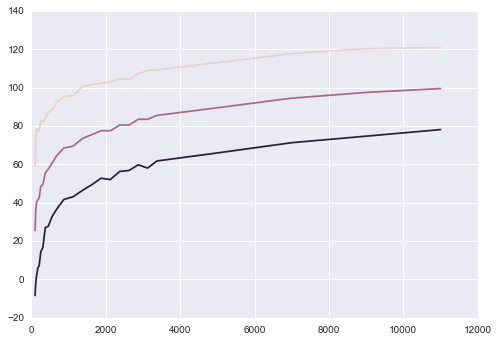

In [16]:
palette = seaborn.cubehelix_palette(n_colors=3) 
for row, color in zip(result_array, palette): 
#     seaborn.pointplot(energies, row, color=color)
    pylab.plot(energies, row, color=color)

# pylab.xlim(0, 3000)


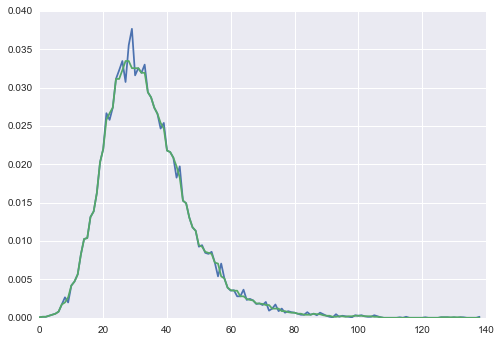

In [28]:
calc = FluctuationCalculation.from_geometry(cascades[-13].main_geometry, 0.8)
pylab.plot(calc.histogram[0])
pylab.plot(calc.make_histogram(filter_size=5)[0])

In [18]:
hist_filter = calc.make_histogram(filter_size=5)[0]

In [19]:
calc.histogram_stats

FitStats(mean=memmap(41.4988), max_bin=25.5, fwhm_bin=33.85139084688708)

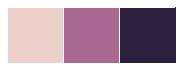

In [20]:
seaborn.palplot(seaborn.cubehelix_palette(3))

In [25]:
cascades[-13].config

<Config version=(1, 1, 0) run_info=RunInfo(particle=<InitialParticle.GAMMA: 'GAMMA'>, incidents=15000, energy_mev=1125) material=Material(name='xenon', w_coeff=5.27249680541111, density_g_cm3=2.169999999999999, rad_len_mm=39.17401302317393) cuts=Cuts(type=<CutsType.G4Cuts: 'G4Cuts'>, energy_kev=1200)>